# Quiz 1

In [1]:
import findspark
import time
findspark.init()

from pyspark import SparkContext
sc=SparkContext("local","quiz1")

21/10/28 21:55:18 WARN Utils: Your hostname, jeongsobin-ui-MacBookPro.local resolves to a loopback address: 127.0.0.1; using 172.30.1.53 instead (on interface en0)
21/10/28 21:55:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/28 21:55:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
def flat(x):
    index1=x[0].find(',')
    index2=x[0].find(',',index1+1)
    index3=x[0].find(',',index2+1)
    list_1=[x[0][:index1],x[0][index1+1:index2],x[0][index2+1:index3],x[0][index3+1:]]
    
    return list_1

M_A1600x800=sc.textFile("matrix/A1600x800.txt").map(lambda line:line.split("\n")).map(flat)
M_A200x100=sc.textFile("matrix/A200x100.txt").map(lambda line:line.split("\n")).map(flat)
M_A3200x1600=sc.textFile("matrix/A3200x1600.txt").map(lambda line:line.split("\n")).map(flat)
M_A400x200=sc.textFile("matrix/A400x200.txt").map(lambda line:line.split("\n")).map(flat)
M_A800x400=sc.textFile("matrix/A800x400.txt").map(lambda line:line.split("\n")).map(flat)
M_B100x10=sc.textFile("matrix/B100x10.txt").map(lambda line:line.split("\n")).map(flat)
M_B1600x160=sc.textFile("matrix/B1600x160.txt").map(lambda line:line.split("\n")).map(flat)
M_B200x20=sc.textFile("matrix/B200x20.txt").map(lambda line:line.split("\n")).map(flat)
M_B400x40=sc.textFile("matrix/B400x40.txt").map(lambda line:line.split("\n")).map(flat)
M_B800x80=sc.textFile("matrix/B800x80.txt").map(lambda line:line.split("\n")).map(flat)


In [3]:
def a100(x):
    output=[]
    for i in range(100):
        output.append([(int(x[1]),i),(int(x[2]),int(x[3]))])
    return output
def b100(x):
    output=[]
    for i in range(100):
        output.append([(i,int(x[2])),(int(x[1]),int(x[3]))])
    return output

def a200(x):
    output=[]
    for i in range(200):
        output.append([(int(x[1]),i),(int(x[2]),int(x[3]))])
    return output
def b200(x):
    output=[]
    for i in range(200):
        output.append([(i,int(x[2])),(int(x[1]),int(x[3]))])
    return output

def a400(x):
    output=[]
    for i in range(400):
        output.append([(int(x[1]),i),(int(x[2]),int(x[3]))])
    return output
def b400(x):
    output=[]
    for i in range(400):
        output.append([(i,int(x[2])),(int(x[1]),int(x[3]))])
    return output

def a800(x):
    output=[]
    for i in range(800):
        output.append([(int(x[1]),i),(int(x[2]),int(x[3]))])
    return output
def b800(x):
    output=[]
    for i in range(800):
        output.append([(i,int(x[2])),(int(x[1]),int(x[3]))])
    return output

def a1600(x):
    output=[]
    for i in range(1600):
        output.append([(int(x[1]),i),(int(x[2]),int(x[3]))])
    return output
def b1600(x):
    output=[]
    for i in range(1600):
        output.append([(i,int(x[2])),(int(x[1]),int(x[3]))])
    return output


matrix200x10=M_A200x100.flatMap(a100)+M_B100x10.flatMap(b100)
matrix400x20=M_A400x200.flatMap(a200)+M_B200x20.flatMap(b200)
matrix800x40=M_A800x400.flatMap(a400)+M_B400x40.flatMap(b400)
matrix1600x80=M_A1600x800.flatMap(a800)+M_B800x80.flatMap(b800)
matrix3200x160=M_A3200x1600.flatMap(a1600)+M_B1600x160.flatMap(b1600)

In [4]:
def output(x):
    temp={}
    for i,j in x:
        if i not in temp:
            temp[i]=j
        else:
            temp[i]=temp[i]*j
        
    return sum(list(temp.values()))

In [5]:
start_200x10= time.time()
m200x10_result=matrix200x10.groupByKey().mapValues(list).mapValues(output).map(lambda x:('matrix200x10',x[1])).reduceByKey(lambda x,y:x+y).collect()
end_200x10 = time.time()
timer_200x10=end_200x10-start_200x10

/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


In [6]:
start_400x20= time.time()
m400x20_result=matrix400x20.groupByKey().mapValues(list).mapValues(output).map(lambda x:('matrix400x20',x[1])).reduceByKey(lambda x,y:x+y).collect()
end_400x20 = time.time()
timer_400x20=end_400x20-start_400x20

In [7]:
start_800x40= time.time()
m800x40_result=matrix800x40.groupByKey().mapValues(list).mapValues(output).map(lambda x:('matrix800x40',x[1])).reduceByKey(lambda x,y:x+y).collect()
end_800x40 = time.time()
timer_800x40=end_800x40-start_800x40

In [ ]:
start_1600x80= time.time()
m1600x80_result=matrix1600x80.groupByKey().mapValues(list).mapValues(output).map(lambda x:('matrix1600x80',x[1])).reduceByKey(lambda x,y:x+y).collect()
end_1600x80 = time.time()
timer_1600x80=end_1600x80-start_1600x80

In [ ]:
start_3200x160= time.time()
m3200x160_result=matrix3200x160.groupByKey().mapValues(list).mapValues(output).map(lambda x:('matrix3200x160',x[1])).reduceByKey(lambda x,y:x+y).collect()
end_3200x160 = time.time()
timer_3200x160=end_3200x160-start_3200x160

# Result & Time plot

In [81]:
timer_1600x80=108000
timer_3200x160=1000000

m1600x80_result=[('matrix1600x80', 'temp1')]
m3200x160_result=[('matrix3200x160', 'temp2')]

#매트릭스가 1600x80일때와 3200x160일때 데이터가 너무 커서인지 연산속도가 몇시간이 지나도록 측정되지 않아
#두값만 임의로 지정해서 진행하였습니다.

In [82]:
import pandas as pd
finalresult = pd.DataFrame(data=[[m200x10_result[0][1],timer_200x10],
                                 [m400x20_result[0][1],timer_400x20],
                                 [m800x40_result[0][1],timer_800x40],
                                 [m1600x80_result[0][1],timer_1600x80],
                                 [m3200x160_result[0][1],timer_3200x160]],
                        index=['M200x10', 'M400x20', 'M800x40', 'M1600x80', 'M3200x160'], 
                           columns=['result','time(s)'])

In [83]:
finalresult=finalresult.transpose()

In [84]:
finalresult

,M200x10,M400x20,M800x40,M1600x80,M3200x160
result,-109161,-414457,1199505,temp1,temp2
time(s),4.276585,46.995375,617.183883,108000.0,1000000.0


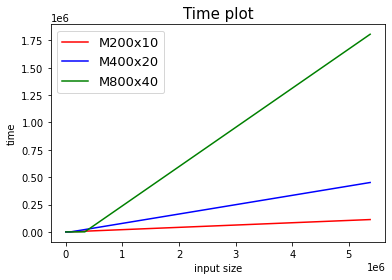

In [86]:
import matplotlib.pyplot as plt
plt.title('Time plot',size=15)
plt.xlabel('input size')
plt.ylabel('time')
plt.plot([0,200*100+100*10,3200*1600+1600*160],[0,finalresult['M200x10'][1],(3200*1600+1600*160)/finalresult['M3200x160'][1]*(200*100+100*10)], 'r',label='M200x10')
plt.plot([0,400*200+200*20,3200*1600+1600*160],[0,finalresult['M400x20'][1],(3200*1600+1600*160)/finalresult['M3200x160'][1]*(400*200+200*20)], 'b',label='M400x20')
plt.plot([0,800*400+400*40,3200*1600+1600*160],[0,finalresult['M800x40'][1],(3200*1600+1600*160)/finalresult['M3200x160'][1]*(800*400+400*40)], 'g',label='M800x40')
#plt.plot([0,1600*800+800*80,3200*1600+1600*160],[0,finalresult['M1600x80'][1],(3200*1600+1600*160)/finalresult['M3200x160'][1]*(1600*800+800*80)], 'c',label='M1600x80')
#plt.plot([0,3200*1600+1600*160],[0,finalresult['M3200x160'][1]], 'm',label='M3200x160')
plt.legend(fontsize=13)
plt.show()